In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import normal
from scipy.stats import norm


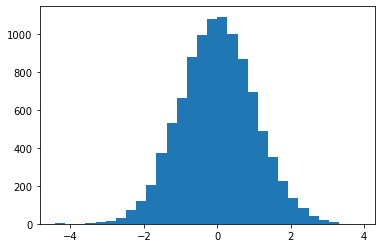

In [2]:
sample = normal(size = 10000) # generador
plt.hist(sample, bins=30)
plt.show()


## Estimación paramétrica

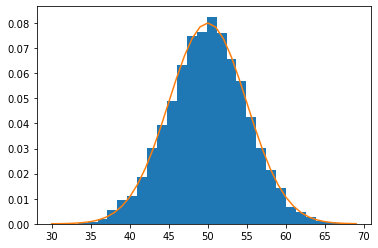

In [3]:
# loc es el promedio
sample = normal(loc=50, scale=5, size=10000) # mu = 50, sigma=5

mu = sample.mean()

sigma = sample.std()

dist = norm(mu, sigma)

values = [value for value in range(30,70)]

proabilidades = [dist.pdf(value) for value in values]

plt.hist(sample, bins=30, density=True)

plt.plot(values, proabilidades)

plt.show()

# Estimación no paramétrica

`Kernel Density estimation`

* [parámetro de suavizado]: smoothing parameter
* [función base]: basis function

[scikit density estimation](https://scikit-learn.org/stable/modules/density.html)


In [5]:
from numpy import hstack
from sklearn.neighbors import KernelDensity

#construimos una distribución bimodal
sample1 = normal(loc=20, scale=5, size=300)
sample2 = normal(loc=40, scale=5, size=700)
sample = hstack((sample1, sample2))

model = KernelDensity(bandwidth=2, kernel='gaussian')

sample = sample.reshape(len(sample), 1)

model.fit(sample)


KernelDensity(bandwidth=2)

In [7]:
values = np.asarray([value for value in range(1, 60)])
values = values.reshape((len(values), 1))
probabilities = model.score_samples(values)  # probabilidad logarítmica
probabilities = np.exp(probabilities)  # inversión de probabilidad


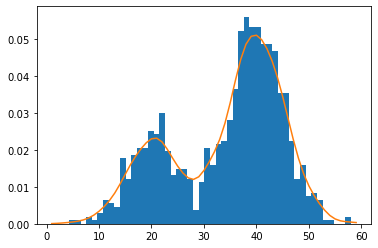

In [8]:
plt.hist(sample, bins=50, density=True)

plt.plot(values, probabilities)

plt.show()
